# Assignment 6A - Hasanat Hasan

## Problem 1 (50 points): Laplace’s Equation in a Box
#### An empty square box has conducting walls, 1 m each. All of the walls are grounded at 0 statvolts, except for the wall at the top, which is at voltage V = 1 statvolt (in the Gauss unit system 1 statvolt corresponds to ≈299.79 volts in SI units).
#### For the two-dimensional case, solve Laplace’s equation for the electrostatic potential $\phi$, subject to boundary conditions $\phi = V$ on the top wall and $\phi = 0$ on the other walls
#### (a) Write a program to compute the solution to the two-dimensional electrostatics problem using the Jacobi method.
#### Use the following parameters: The grid spacing a = 1 cm, so there are 100 grid points on each side (101 if we count the points at both the beginning and the end)
### (b) Make a density plot

# Solution 
### (converges in less than a second)

Converged after 10561 iterations


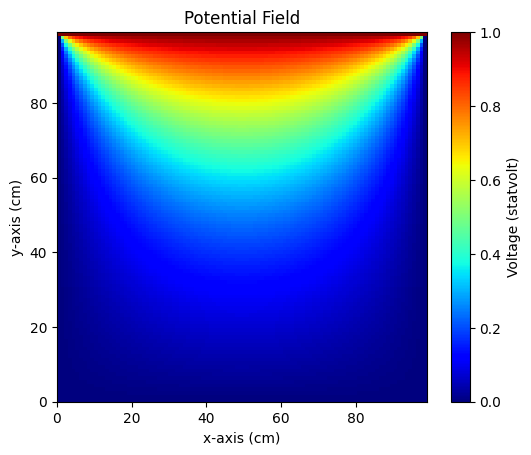

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the grid
a = 100 # 100cm = 1m
x_axis = np.arange(0,a,1) # x-coordinates (e.g., x_1, x_2, ..., x_N)
y_axis = np.arange(0,a,1)   # y-coordinates (e.g., y_1, y_2, ..., y_M)
X_mesh_array, Y_mesh_array = np.meshgrid(x_axis, y_axis)
phi_grid  = np.zeros((len(x_axis),len(y_axis)))

# apply BC:
phi_grid[:,0] = 0 # side
phi_grid[:,-1] = 0 # side
phi_grid[-1,:] = 1 # top wall (statvolt)
phi_grid[0,:] = 0 

# jacobi method with vectorized updates
max_iter = 20000
tolerance = 1e-6
for n in range(max_iter):
    # iteratively update the interior
    old_grid = phi_grid.copy()
    phi_grid[1:-1, 1:-1] = 0.25 * (
        phi_grid[2:, 1:-1] + 
        phi_grid[:-2, 1:-1] + 
        phi_grid[1:-1, 2:] + 
        phi_grid[1:-1, :-2]
    )
    if np.max(np.abs(phi_grid - old_grid)) < tolerance:
        print(f"Converged after {n} iterations")
        break

# Plot the array Z using imshow
plt.imshow(phi_grid, cmap='jet', origin='lower', extent=[x_axis[0], x_axis[-1], y_axis[0], y_axis[-1]])  # Map array to real coordinates
plt.colorbar(label='Voltage (statvolt)')  # Add a color bar
plt.title('Potential Field')  # Title of the plot
plt.xlabel('x-axis (cm)')  # Label x-axis
plt.ylabel('y-axis (cm)')  # Label y-axis
plt.show()


## Problem 2 (50 points): Poisson’s Equation with Square Charges
### Two square charges are placed inside a square two-dimensional box. The potential is zero at the walls, and the charges are defined such that $4\pi \rho = +1$ and $4\pi \rho = −1$ (surface charge density in statcoulomb/cm2, where 1 statcoulomb $\sim 3.33564\times 10^{10}$ coulombs in SI) at the locations of the positive and negative charges, respectively.
### (a) Write a program, or modify the previous one, to solve Poisson’s equation using Jacobi’s method, in the presence of the charge density specified above. Continue iterating until the solution for the electric potential changes by less than $10^{-6}$ statvolt per step at every grid point. 
### Note: In the Gauss system of units the Poisson’s equation is written as:
$$
\nabla ^2\phi = -4 \pi\phi
$$

### (b) Make a density plot of the result.


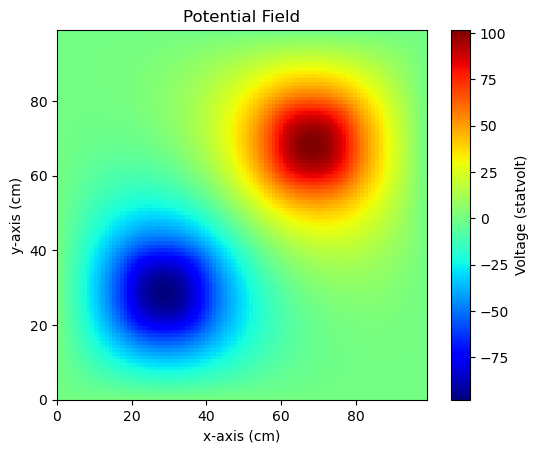

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the grid
a = 100 # 100cm = 1m
x_axis = np.arange(0,a,1) # x-coordinates (e.g., x_1, x_2, ..., x_N)
y_axis = np.arange(0,a,1)   # y-coordinates (e.g., y_1, y_2, ..., y_M)
X_mesh_array, Y_mesh_array = np.meshgrid(x_axis, y_axis)
phi_grid  = np.zeros((len(x_axis),len(y_axis)))
rho_grid = np.zeros_like(phi_grid)

# apply BC:
phi_grid[:,0] = 0 # side
phi_grid[:,-1] = 0 # side
phi_grid[-1,:] = 0
phi_grid[0,:] = 0 # top wall (statvolt)

# Insert the charge density
rho_grid[59:79, 59:79] = 1 /(4 * np.pi)# 20**2 $ assume 4\pi p = 1 -> p = 1/4\pi so p_ij = 1/4\pi
rho_grid[19:39, 19:39] = -1 /(4 * np.pi)# 20**2

# jacobi method with vectorized updates
max_iter = 20000
tolerance = 1e-8
for n in range(max_iter):
    # iteratively update the interior
    old_grid = phi_grid.copy()
    phi_grid[1:-1, 1:-1] = 0.25 * (
        phi_grid[2:, 1:-1] + 
        phi_grid[:-2, 1:-1] + 
        phi_grid[1:-1, 2:] + 
        phi_grid[1:-1, :-2]
    ) +   np.pi * rho_grid[1:-1, 1:-1] # Add charge density term
    if np.max(np.abs(phi_grid - old_grid)) < tolerance:
        print(f"Converged after {n} iterations")
        break

plt.imshow(phi_grid, cmap='jet', origin='lower', extent=[x_axis[0], x_axis[-1], y_axis[0], y_axis[-1]])  # Map array to real coordinates
plt.colorbar(label='Voltage (statvolt)')  # Add a color bar
plt.title('Potential Field')  # Title of the plot
plt.xlabel('x-axis (cm)')  # Label x-axis
plt.ylabel('y-axis (cm)')  # Label y-axis
plt.show()
